# Import libraries

In [87]:
from utils import generate_samples_linear_reg
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import scipy.stats as stats

# Generate sample

In [88]:
# Sample data from population which is linearly distributed

samples = 100
features = 1
lower_bound = 0
upper_bound = 1000
intercept = 10
coeffecients = [20]
sigma = 1000

X, y = generate_samples_linear_reg(
    samples,
    features,
    lower_bound,
    upper_bound,
    intercept,
    coeffecients,
    sigma
)

print("Shape of samples is: ",X.shape)
# print("Samples are: ", X)

print("\n Shape of labels is: ",y.shape)
# print("Labels are: ", y)



Shape of samples is:  (100, 1)

 Shape of labels is:  (100,)


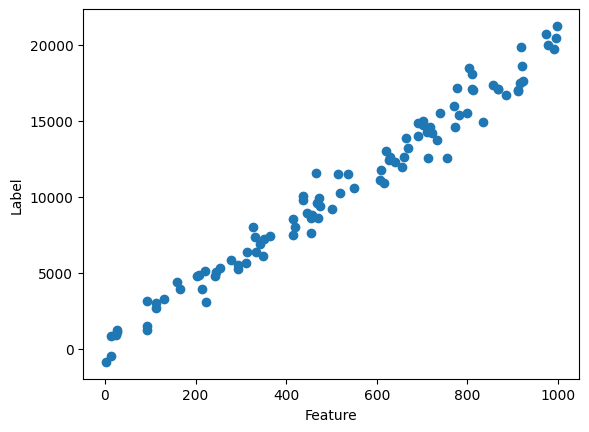

In [89]:
# Plot of samples - To verify linearity assumption

plt.scatter(X,y)
plt.xlabel("Feature")
plt.ylabel("Label")
plt.show()


# Train model

In [90]:
# Train linear regression model

X_with_intercept = sm.add_constant(X)
model = sm.OLS(y,X_with_intercept)
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     3865.
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           1.50e-80
Time:                        21:21:11   Log-Likelihood:                -820.65
No. Observations:                 100   AIC:                             1645.
Df Residuals:                      98   BIC:                             1651.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.4426    189.569      0.799      0.426    -224.751     527.636
x1            19.8092      0.319     62.172      0.000      19.177      20.441
==============================================================================
Omnibus:                        0.376   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.828   Jarque-Bera (JB):                0.093
Skew:                           0.039   Prob(JB):                        0.954
Kurtosis:                       3.128   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Prediction

Mean squared error is:  786273.3185985594
Estimated standard deviation in errors is (Square root of mean squared error of fitted model):  895.7230112348755
Actual standard deviation in errors is:  1000


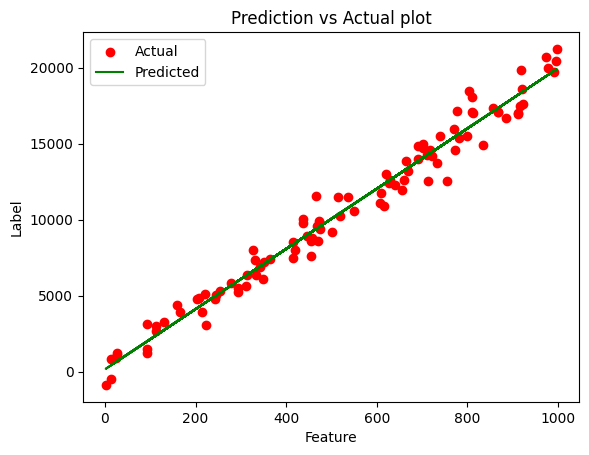

In [91]:
# Predictions

y_pred = model_results.predict(X_with_intercept)
mean_squared_error = np.mean((y - y_pred) ** 2)
print("Mean squared error is: ",mean_squared_error)
print("Estimated standard deviation in errors is (Square root of mean squared error of fitted model): ",
      np.sqrt(len(y)*mean_squared_error/(len(y)-X.shape[1]-1)))
print("Actual standard deviation in errors is: ", sigma)

# Plot of actual and predicted labels

plt.scatter(X,y,color='r',label='Actual')
plt.plot(X,y_pred,color='g',label='Predicted')
plt.xlabel("Feature")
plt.ylabel("Label")
plt.title("Prediction vs Actual plot")
plt.legend()
plt.show()


# Diagnostic plots

In [92]:
# Get leverage points and influence points in sample. These will be used to plot graphs.
# Leverage points - These are points (X) than are far away from mean (X_mean)
# Influence points - These are the points (X) which have large influence on the fit of the model.

influence = model_results.get_influence() 
leverage = influence.hat_matrix_diag 

In [103]:
errors = y-y_pred
(model_results.resid_pearson==errors_standardized).sum()
std = (errors-np.mean(errors))/np.std(errors,ddof=2)
# (model_results.resid_pearson==std)
(model_results.resid==errors).sum()
# np.std(errors)
# model_results.resid_pearson
# std

100

Min error is:  -2560.095233632159
Max error is:  2360.2256436273656
Mean of errors is:  0.0


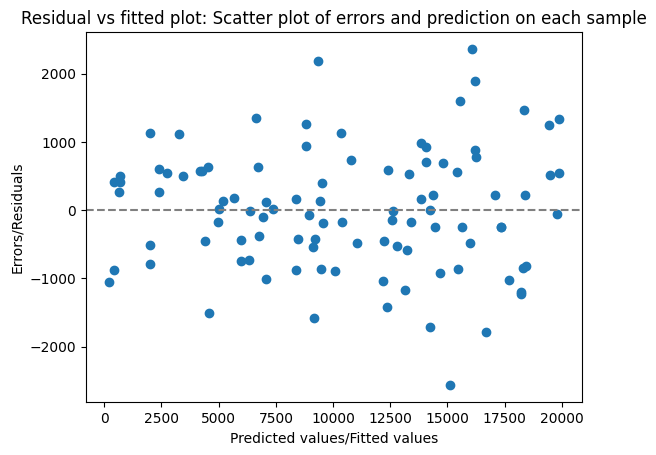

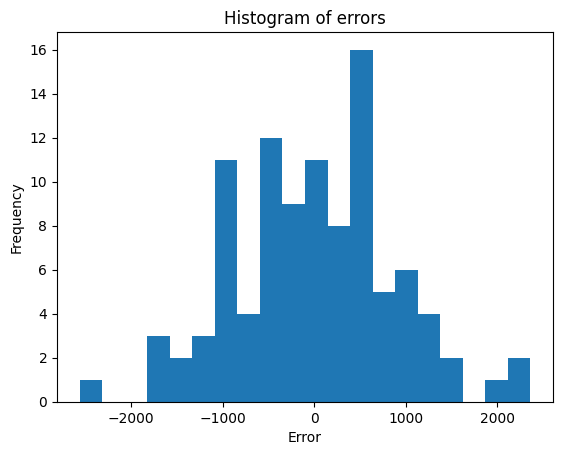

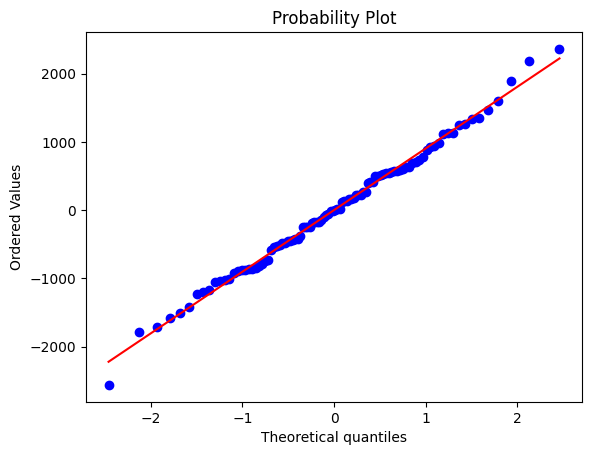

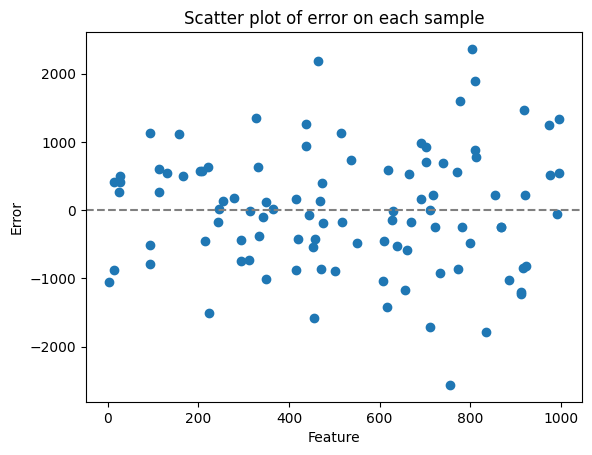

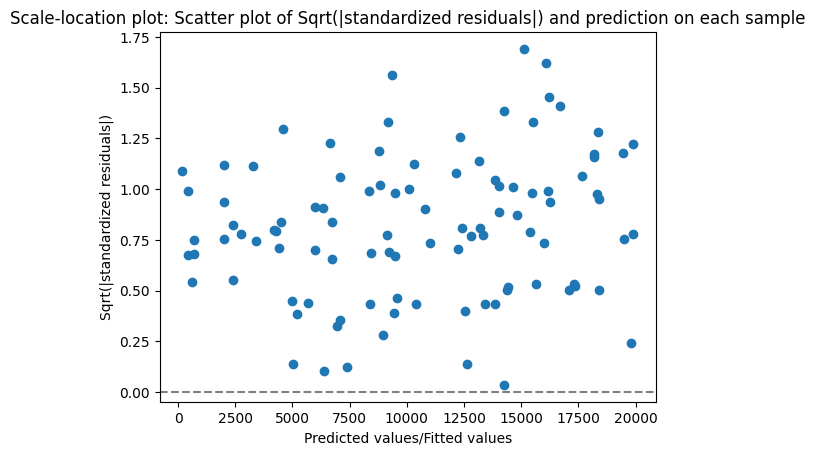

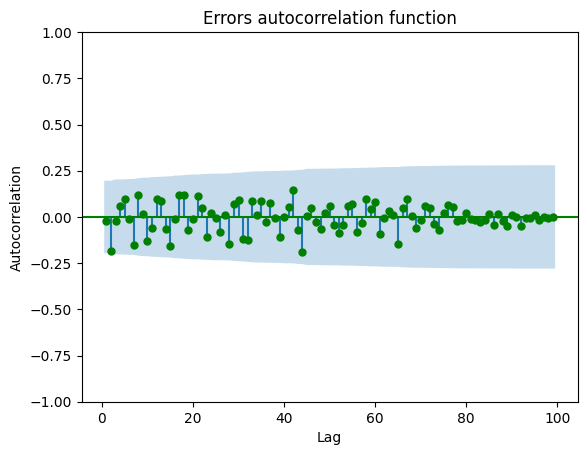

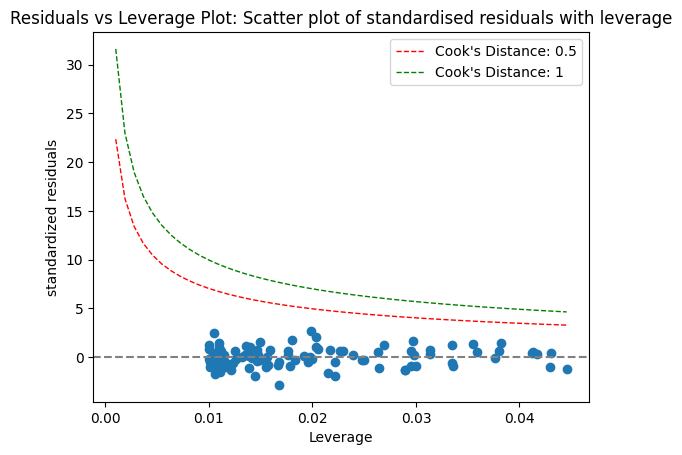

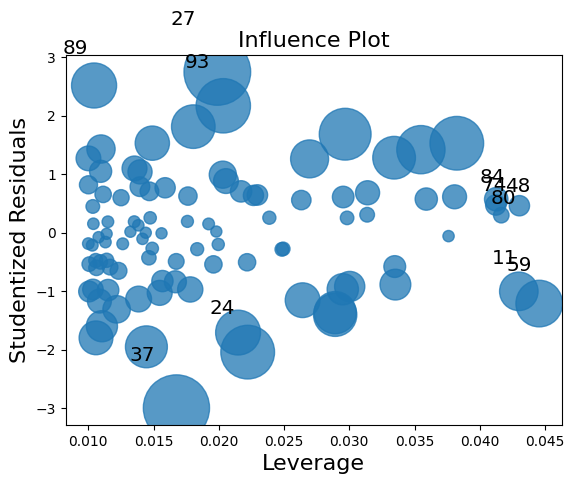

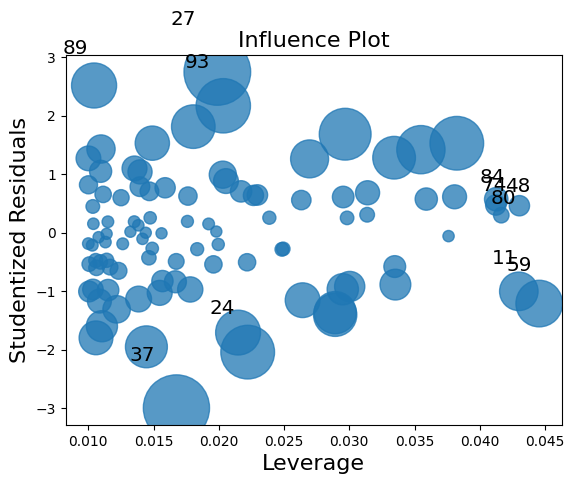

In [115]:
# Plot of errors

errors = y-y_pred
errors_standardized = (errors-np.mean(errors))/np.std(errors,ddof=2)
errors_standardized_abs_sqrt = np.sqrt(np.absolute((errors-np.mean(errors)))/np.std(errors,ddof=2))

# Error Statistics - To check mean of errors

print("Min error is: ",np.min(errors))
print("Max error is: ",np.max(errors))
print("Mean of errors is: ",round(np.mean(errors),2))

# Residual vs fitted plot - To check linearity and homoscedasticity

plt.scatter(y_pred,errors)
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel("Predicted values/Fitted values")
plt.ylabel("Errors/Residuals")
plt.title("Residual vs fitted plot: Scatter plot of errors and prediction on each sample")
plt.show()

# Histogram of errors - To check Normality

plt.hist(errors, bins=samples//5)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Histogram of errors")
plt.show()

# Error Q-Q plot - To check normality

stats.probplot(errors, dist="norm", plot=plt)
plt.show() 


# Error scatter plot - To check homoscedasticity

plt.scatter(X,errors)
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel("Feature")
plt.ylabel("Error")
plt.title("Scatter plot of error on each sample")
plt.show()

# Scale-location plot - To check homoscedasticity

plt.scatter(y_pred,errors_standardized_abs_sqrt)
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel("Predicted values/Fitted values")
plt.ylabel("Sqrt(|standardized residuals|)")
plt.title("Scale-location plot: Scatter plot of Sqrt(|standardized residuals|) and prediction on each sample")
plt.show()

# Error autocorrelation plot - To check independence of errors

tsaplots.plot_acf(errors, color='g', lags=np.arange(1,len(errors)),title='Errors autocorrelation function')
# tsaplots.plot_acf(errors, color='g', lags=np.arange(1,100),title='Errors autocorrelation function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Residual vs leverage plot: A leverage point (X) is one which is far away from the mean value (X_mean)
cook_distance = model_results.get_influence().cooks_distance[0]
    # Plot cook's line of 0.5
x_values = np.linspace(0.001, max(leverage), 50)
y_values = np.apply_along_axis(lambda x: np.sqrt((0.5 * X.shape[1] * (1 - x)) / x),axis=0,arr=x_values)
plt.plot(x_values, y_values, label="Cook's Distance: 0.5", lw=1, ls='--', color='red')
    # Plot cook's line of 1
x_values = np.linspace(0.001, max(leverage), 50)
y_values = np.apply_along_axis(lambda x: np.sqrt((1 * X.shape[1] * (1 - x)) / x),axis=0,arr=x_values)
plt.plot(x_values, y_values, label="Cook's Distance: 1", lw=1, ls='--', color='green')

plt.scatter(leverage, errors_standardized) 
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel('Leverage') 
plt.ylabel('standardized residuals') 
plt.title('Residuals vs Leverage Plot: Scatter plot of standardised residuals with leverage') 
plt.legend()
plt.show()

# Plot Cook's distance plot 
sm.graphics.influence_plot(model_results, criterion="cooks") 
# The numbers in the output of this graph indicate sample index numbers which are influential